In [4]:
%load_ext autoreload
%autoreload 2
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from pinn_excitation_traj.config import Config as BaseConfig   # ← 改名避免冲突
from pinn_excitation_traj.model_pinn import *

class Config(BaseConfig):
    # Device
    device = "cpu"                 # cpu cuda
    model_type = "pro"             # "pro"  "basic" 
    use_residual =  True           # 是否使用残差连接 False True
    norm_type = "layer"           # None / "batch" / "layer"

    # Task
    dof = 6
    T = 20
    M = 1000

    # Joint limits
    pi = math.pi
    q_max = torch.tensor([pi, 0.5*pi, 2/3*pi, 2/3*pi, 2/3*pi, pi])
    q_min = -q_max

    dq_max = torch.tensor([0.8, 0.8, 0.8, 1.0, 1.0, 1.5])
    ddq_max = torch.tensor([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

    # Model
    activation = "sin"             # sin / tanh / relu
    hidden = (256, 256)            # (128, 128) (256, 256) (512, 512)  

    # Training options
    optimizer = "Adam"             # "Adam" / "AdamW" / "LBFGS"     "LBFGS" 不收敛
    lr = 7e-4                      # 1e-3 1e-4
    epochs = 2000                   # 1000 2000

    # Scheduler settings
    use_scheduler = True          # True False
    scheduler_type = "Cosine"      # "Cosine" / "None"
    eta_min = 1e-5                 # for CosineAnnealingLR

    # Loss weights
    w_boundary = 1e2
    w_bounds = 1e2
    w_smooth = 0.5e1

    # numerical stability
    eps = 1e-8
    # save models
    save_model = False

cfg = Config()
model, Loss = train(cfg)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using activation function: Sin()


Traj 0: 100%|██████████| 2000/2000 [00:46<00:00, 43.27it/s, loss=101, cond=94.1, lr=1.00e-05, boundary=0.0075, bounds=0.000557, smooth=1.21] 


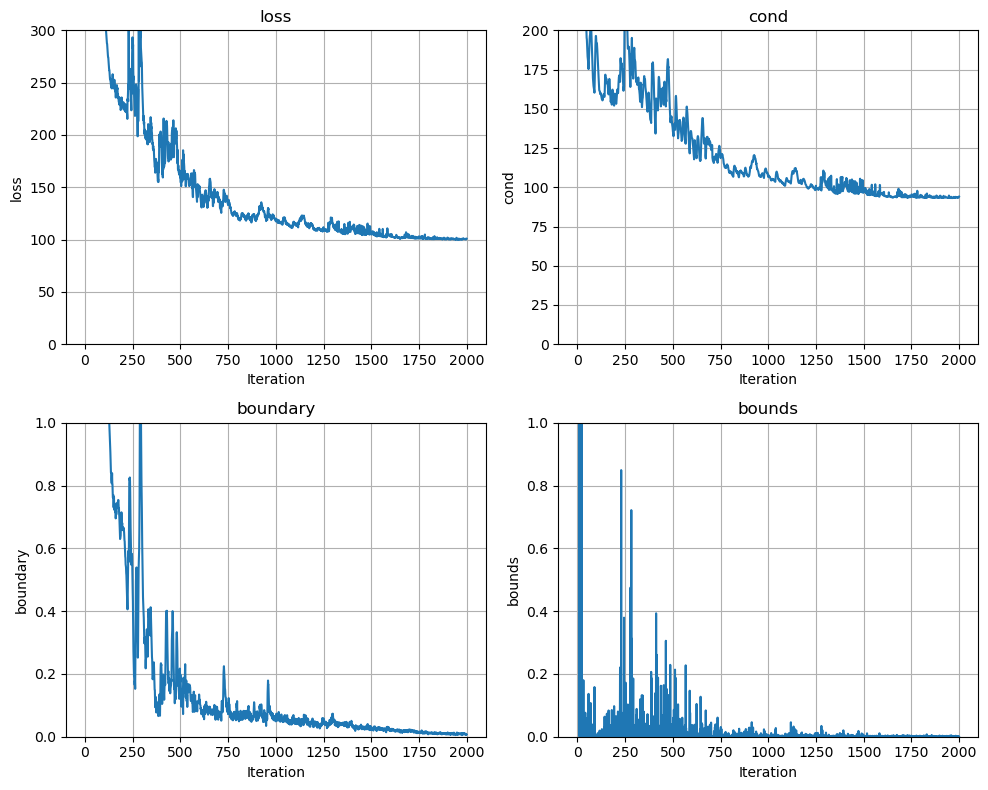

In [5]:
import matplotlib.pyplot as plt

def plot_log_dict_subplots(log):
    keys = ['loss', 'cond', 'boundary', 'bounds']
    ylims = {
        'loss':     (0, 300),
        'cond':     (0, 200),     # 也可以改成 log-scale
        'boundary': (0, 1),
        'bounds':   (0, 1),
    }
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    for ax, k in zip(axes, keys):
        if k in log:
            ax.plot(log[k])
            ax.set_title(k)
            ax.set_xlabel('Iteration')
            ax.set_ylabel(k)
            ax.grid(True)
            if k in ylims:
                ymin, ymax = ylims[k]
                ax.set_ylim(ymin, ymax)
        else:
            ax.set_visible(False)

    plt.tight_layout()
    plt.show()

plot_log_dict_subplots(Loss)